In [1]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(0, '../src/')

In [4]:
from logger import LogData, TemporalLogger, EnvLogger
from utils import plot_typography

In [5]:
plot_typography(True, 12, 14, 16)

In [10]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log")
envs =  ["PongNoFrameskip-v0", "PongNoFrameskip-v4",
         "BreakoutNoFrameskip-v0", "BreakoutNoFrameskip-v4",
         "SeaquestNoFrameskip-v0", "SeaquestNoFrameskip-v4"]
cols = ['attention_target', 'attention_type', 'env_name', 
        'timestamp', 'mean_reward',
       'mean_feat_std', 'mean_proxy']
decimate = 100


def figure_factory(log_dir, env, variant, rew_scale=5, feat_scale=1, decimate=100, save=True, loc_feat=1, loc_rwd=4, zoom_feat=2.5, zoom_rwd=2.5):
    # sanity check
    if variant not in [0,4]:
        raise ValueError(f"Invalid variant, got {variant}, should be 0 or 4")
    
    # load data 
    el = EnvLogger(f"{env}NoFrameskip-v{variant}", log_dir, decimate)

    # plot
    rwd_metrics = el.plot_decorator(keyword="rewards", save=save, y_inset_std_scale=rew_scale, loc=loc_rwd, zoom=zoom_rwd)
    el.plot_decorator(keyword="features", save=save, y_inset_std_scale=feat_scale, loc=loc_feat, zoom=zoom_feat)

    return rwd_metrics

---------------------------------------------------
Baseline, rewards, 14.10082626561367, 0.9466960695205324
ICM, single attention, rewards, 14.894776390859246, 1.0
ICM, double attention, rewards, 14.007907418817837, 0.9404577182786261
AttA2C, rewards, 14.018834198614167, 0.9411913163877617
RCM, rewards, 14.701438013286754, 0.9870197193634178
---------------------------------------------------
Baseline, features, 0.263527996042246, 0.2869014744242379
ICM, single attention, features, 0.2881306463575053, 0.3136862439978671
ICM, double attention, features, 0.2863231411975223, 0.3117184231089418
AttA2C, features, 0.9185313410155928, 1.0
RCM, features, 0.26566310767539, 0.2892259586718665


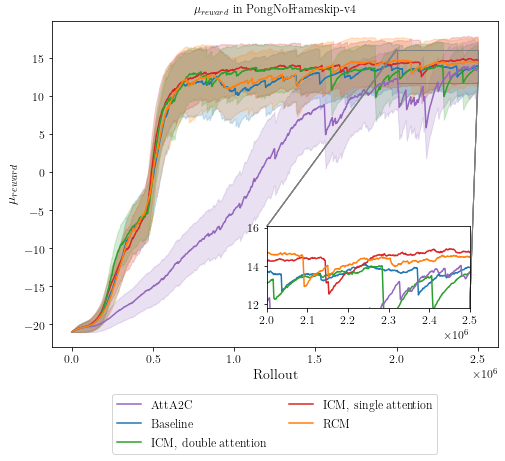

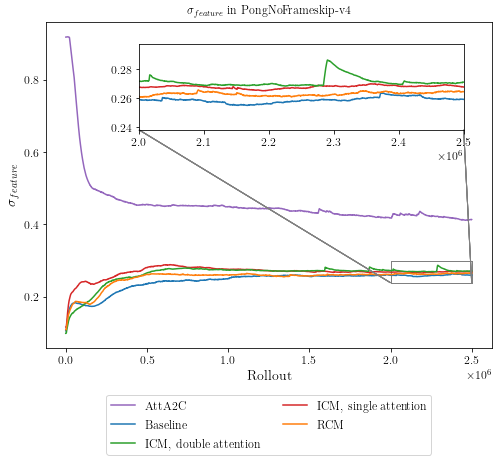

In [11]:
pong_metrics4 = figure_factory(log_dir, "Pong", 4, 5, .5, 100, save=False, loc_rwd=4, loc_feat=1, zoom_rwd=2.5, zoom_feat=4) 

---------------------------------------------------
RCM, rewards, 44.88180924526146, 0.9532540750619231
Baseline, rewards, 44.74723977751706, 0.9503959261667824
ICM, single attention, rewards, 45.586232310351214, 0.9682154629528382
ICM, double attention, rewards, 43.44161328920448, 0.9226654538123472
AttA2C, rewards, 47.082735253291155, 1.0
---------------------------------------------------
RCM, features, 0.4026167847195444, 0.7575288014083501
Baseline, features, 0.3913455893033198, 0.736321898273302
ICM, single attention, features, 0.41431579979651656, 0.779540652889133
ICM, double attention, features, 0.4057384335868263, 0.7634022250076594
AttA2C, features, 0.5314870985380681, 1.0


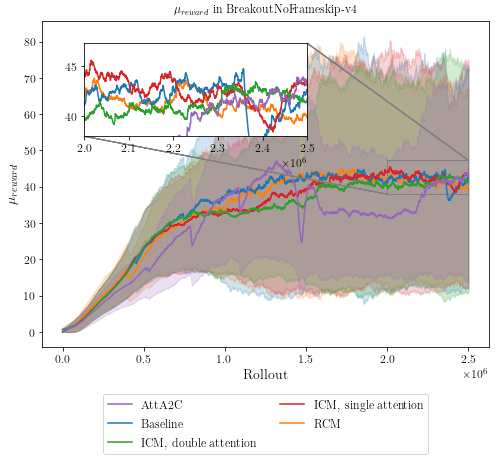

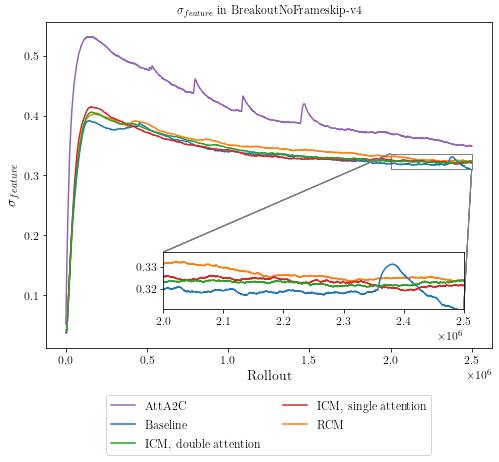

In [12]:
breakout_metrics4 = figure_factory(log_dir, "Breakout", 4, 3.5, 1, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=2.75, zoom_feat=3.7) 

---------------------------------------------------
Baseline, rewards, 1805.8424059604015, 0.8982670875990509
ICM, single attention, rewards, 1887.50762232385, 0.9388892237382938
ICM, double attention, rewards, 2010.3624310528612, 1.0
AttA2C, rewards, 1491.6428031451583, 0.7419770585167369
RCM, rewards, 1941.0086872051622, 0.9655018703212748
---------------------------------------------------
Baseline, features, 0.2684388298716237, 0.4447978293474664
ICM, single attention, features, 0.26245144690105476, 0.4348768542409415
ICM, double attention, features, 0.2866472907516775, 0.47496888872467885
AttA2C, features, 0.6035075087156622, 1.0
RCM, features, 0.26941368681001937, 0.44641314800434656


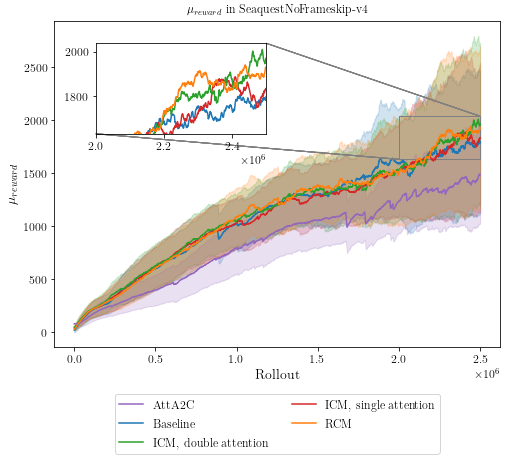

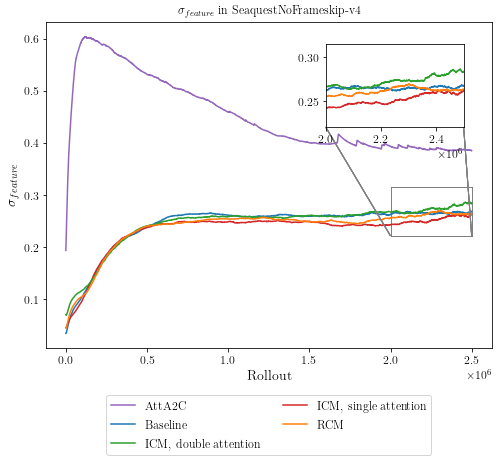

In [13]:
seaquest_metrics4 = figure_factory(log_dir, "Seaquest", 4, 1.2, 1., 100, save=False, loc_rwd=2, loc_feat=1, zoom_rwd=2.1, zoom_feat=1.7) 

In [ ]:
el = EnvLogger("PongNoFrameskip-v4", log_dir, decimate)

In [ ]:
el.params_df[cols].sort_values(by=["mean_reward", "mean_proxy"], ascending=False)#.loc[el.params_df.timestamp == '2019-07-20 10_21_45']

In [ ]:
el.plot_mean_std(*["rewards"])

In [ ]:
el.plot_mean_std(*["features"])

In [ ]:
el.plot_proxy()

In [ ]:
el.plot_rewards()

In [ ]:
el.plot_feat_std()

---------------------------------------------------
Baseline, rewards, 14.242315186344161, 0.9613805902944346
ICM, single attention, rewards, 14.8144401188527, 1.0
ICM, double attention, rewards, 14.309682647049204, 0.9659280089052339
AttA2C, rewards, 13.986562602490473, 0.9441168542502879
RCM, rewards, 14.807253449390586, 0.999514887541854
---------------------------------------------------
Baseline, features, 0.25621727993543214, 0.2766829885059514
ICM, single attention, features, 0.25615468617522263, 0.27661539498282545
ICM, double attention, features, 0.2717061127869625, 0.29340901324132657
AttA2C, features, 0.9260319231007617, 1.0
RCM, features, 0.27429376763820973, 0.2962033605923149


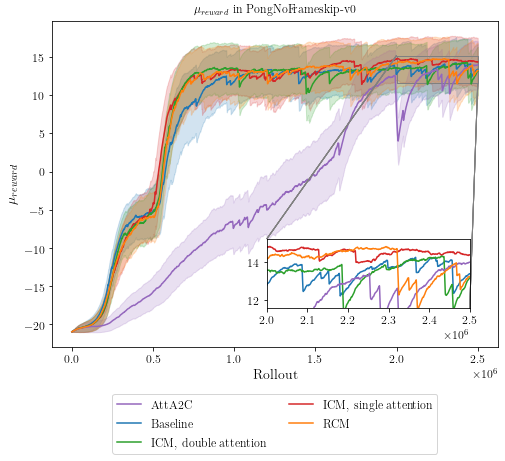

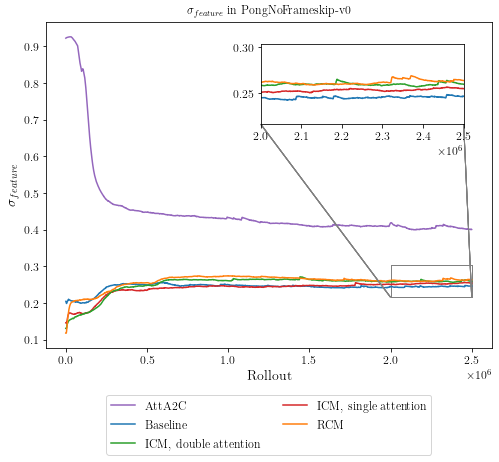

In [7]:
# seeds set

pong_metrics0 = figure_factory(log_dir, "Pong", 0, 3.85, .75, 100, save=False, loc_rwd=4, loc_feat=1)

---------------------------------------------------
AttA2C, rewards, 52.04150595826987, 1.0
Baseline, rewards, 42.80308563992788, 0.8224797659439383
ICM, single attention, rewards, 46.40596608793823, 0.8917106688870501
ICM, double attention, rewards, 43.230687835997436, 0.8306963267101167
RCM, rewards, 42.32754118840016, 0.8133419740455056
---------------------------------------------------
AttA2C, features, 0.5700534072933543, 1.0
Baseline, features, 0.4126035412903011, 0.7237980442032018
ICM, single attention, features, 0.40720118995906107, 0.7143211228093088
ICM, double attention, features, 0.36515425377439154, 0.6405614791571276
RCM, features, 0.39859080442791905, 0.6992165985296898


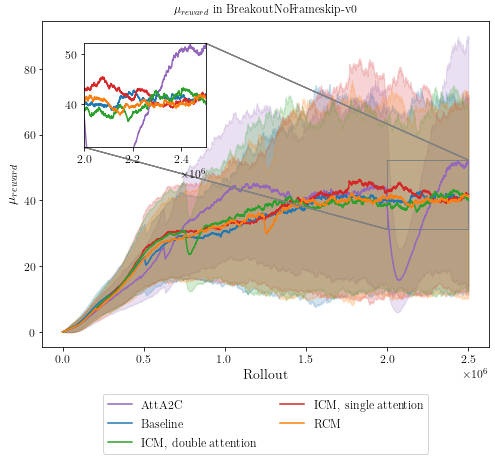

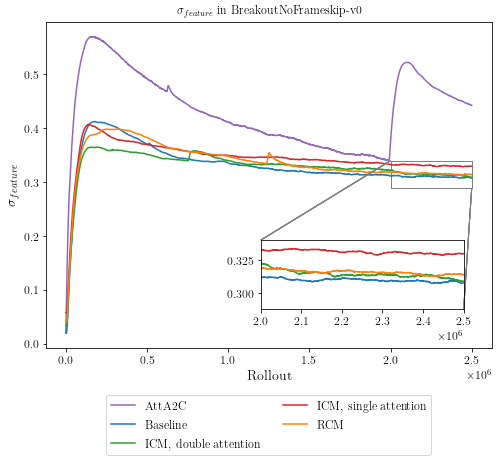

In [8]:
#not saved
breakout_metrics0 = figure_factory(log_dir, "Breakout", 0, 2.4, .5, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=1.5, zoom_feat=2.5)

---------------------------------------------------
Baseline, rewards, 2031.0968097507832, 0.9604526182834049
RCM, rewards, 2114.7287967009934, 1.0
ICM, single attention, rewards, 1891.2602783697805, 0.8943275758670205
ICM, double attention, rewards, 1841.0588865678706, 0.8705886492111652
AttA2C, rewards, 1381.5934388217906, 0.6533194426524553
---------------------------------------------------
Baseline, features, 0.27783516175564477, 0.4659732985367594
RCM, features, 0.2710136316462325, 0.45453251880943935
ICM, single attention, features, 0.26522263282440545, 0.44482010226080065
ICM, double attention, features, 0.26909150926008174, 0.4513088170187577
AttA2C, features, 0.5962469579868579, 1.0


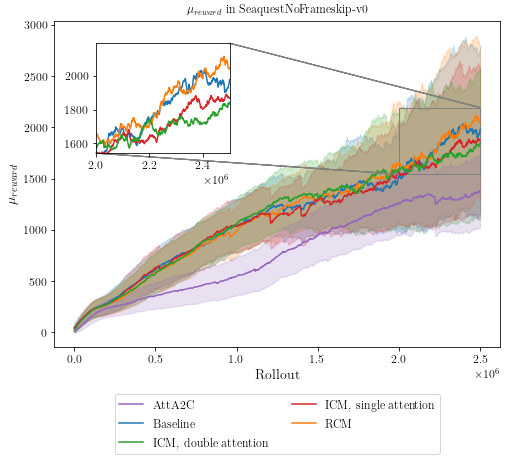

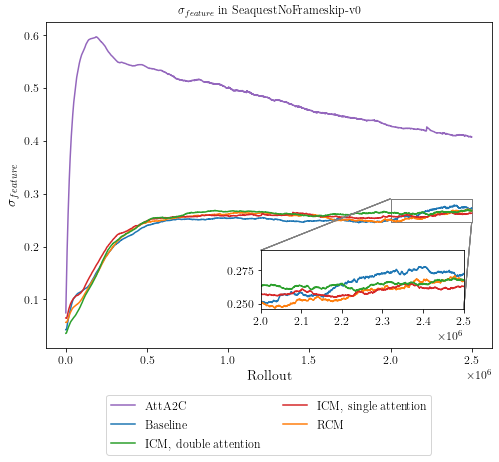

In [9]:
#not saved
seaquest_metrics0 = figure_factory(log_dir, "Seaquest", 0, 1.4, .4, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=1.65, zoom_feat=2.5) 

In [14]:
df0 = pd.DataFrame([pong_metrics0, breakout_metrics0, seaquest_metrics0])
df4 = pd.DataFrame([pong_metrics4, breakout_metrics4, seaquest_metrics4])
df=pd.concat([df0,df4])

In [15]:
df

,Baseline,"ICM, single attention","ICM, double attention",AttA2C,RCM
0,96.138059,100.000000,96.592801,94.411685,99.951489
1,82.247977,89.171067,83.069633,100.000000,81.334197
2,96.045262,89.432758,87.058865,65.331944,100.000000
0,94.669607,100.000000,94.045772,94.119132,98.701972
1,95.039593,96.821546,92.266545,100.000000,95.325408
2,89.826709,93.888922,100.000000,74.197706,96.550187


In [16]:
df.to_numpy().mean(axis=0), df.to_numpy().std(axis=0), np.median(df.to_numpy(),axis=0)

(array([92.32786763, 94.88571552, 92.17226928, 88.01007786, 95.31054211]),
 array([ 4.98387019,  4.46177857,  5.67653452, 13.35974642,  6.47953637]),
 array([94.85459978, 95.35523433, 93.1561586 , 94.26540853, 97.62607948]))